# Credit Card Fraud Detection

# Content 
- **[Import Libraries](#section1)**
- **[Download dataset](#section2)**
- **[Read the dataset ](#section3)**
- **[Visualise percentage of fraud )](#section4)**
- **[ROC-AUC Score](#section5)**
- **[Scale data and define a target](#section6)**
- **[Split data](#section7)**
- **[Decision Tree + time run check](#section8)**
    - [Decision Tree Evaluation](#section9)
- **[Support Vector Machine + time run check](#section10)**
    - [upport Vector Machine](#section11)
- **[Result](#section12)**

<a id="section1"></a>
### Import Libraries 

In [8]:
import time
import warnings
import numpy as np
import pandas as pd
import opendatasets as od
from sklearn import metrics  
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from __future__ import print_function
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
# pip install snapml
# pip install opendatasets

<a id="section2"></a>
### Download dataset

In [2]:
warnings.filterwarnings("ignore")
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Skipping, found downloaded files in "./creditcardfraud" (use force=True to force download)


<a id="section3"></a>
### Read the dataset

In [3]:
df = pd.read_csv('creditcardfraud/creditcard.csv')
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [29]:
df.shape

(284807, 31)

In [33]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

<a id="section4"></a>
### Visualise percentage of fraud 

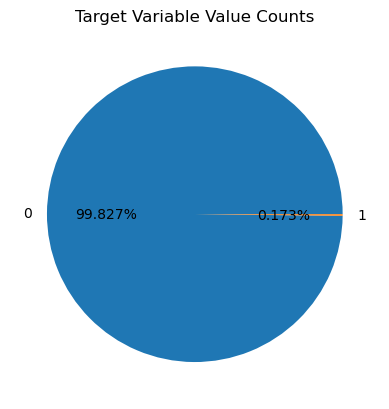

In [3]:
labels = df.Class.unique()
sizes = df.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

<a id="section5"></a>
### ROC-AUC Score

**Receiver Operating Characteristic - Area Under the Curve** is a performance metric used to evaluate the classification models, in binary classification problems. It quantifies the ability of a model to distinguish between positive and negative classes across different thresholds.
**ROC-AUC** provides a single scalar value that summarizes the performance of a binary classification model in terms of its ability to discriminate between positive and negative instances. Higher ROC-AUC scores indicate better model performance.
Interpretation:

- AUC = 1: Perfect classifier (it achieves perfect separation between positive and negative classes).
- AUC = 0.5: Classifier performs as well as random guessing (no discrimination ability).
- AUC < 0.5: Classifier performs worse than random guessing (inverse prediction).

<a id="section6"></a>
### Scale data and define a target

In [4]:
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values
X = data_matrix[:, 1:30]
y = data_matrix[:, 30]
X = normalize(X, norm="l1")
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (284807, 29) y.shape= (284807,)


<a id="section7"></a>
### Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (199364, 29) Y_train.shape= (199364,)
X_test.shape= (85443, 29) Y_test.shape= (85443,)


<a id="section8"></a>
### Decision Tree + time run check

In [6]:
w_train = compute_sample_weight('balanced', y_train)
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  2.49551


<a id="section9"></a>
#### Decision Tree Evaluation (ROC-AUC score, R2 score)

In [9]:
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
y_pred = sklearn_dt.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Decision tree ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))
print('Decision tree Accuracy score : {0:.3f}'.format(accuracy_score))

Decision tree ROC-AUC score : 0.937
Decision tree Accuracy score : 0.971


<a id="section10"></a>
### Support Vector Machine + time run check

In [10]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, fit_intercept=False)
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  19.10


<a id="section11"></a>
#### Support Vector Machine Evaluation (ROC-AUC score, R2 score)

In [11]:
sklearn_pred = sklearn_svm.decision_function(X_test)
y_pred = sklearn_dt.predict(X_test)
accuracy_score = metrics.accuracy_score(y_test, y_pred)
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("Support Vector Machine ROC-AUC score:   {0:.3f}".format(acc_sklearn))
print('Support Vector Machine Accuracy score : {0:.3f}'.format(accuracy_score))

Support Vector Machine ROC-AUC score:   0.976
Support Vector Machine Accuracy score : 0.971


<a id="section11"></a>
### Result

**ROC-AUC score of 0.976.  that the model has very good discrimination ability in distinguishing between the positive and negative classes. In other words, there is a high probability (approximately 97.6%) that the model ranks a randomly chosen positive instance higher than a randomly chosen negative instance across different threshold settings. This suggests that the model is performing well and is effective in its classification task.**

<a id="section34"></a>
### Author: Ilia Grishkin
#### https://github.com/replicant34/